In [6]:
from google.colab import files
uploaded = files.upload()

Saving Titanic.zip to Titanic (1).zip


In [7]:
import zipfile
import os

with zipfile.ZipFile('Titanic.zip', 'r') as zip_ref:
    zip_ref.extractall()

os.listdir()

['.config',
 'test.csv',
 'Titanic (1).zip',
 'gender_submission.csv',
 'Titanic.zip',
 'train.csv',
 'sample_data']

In [25]:
# Data Loading and Exploring
import pandas as pd

data = pd.read_csv('test.csv')
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
# Identifying Null values
data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [27]:
# Replacing Null Values
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [28]:
# Drop
if 'Cabin' in data.columns:
    data.drop(columns='Cabin', inplace=True)

In [31]:
# Checking missing Values
data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [29]:
# Removing Duplicates
data.drop_duplicates(inplace=True)

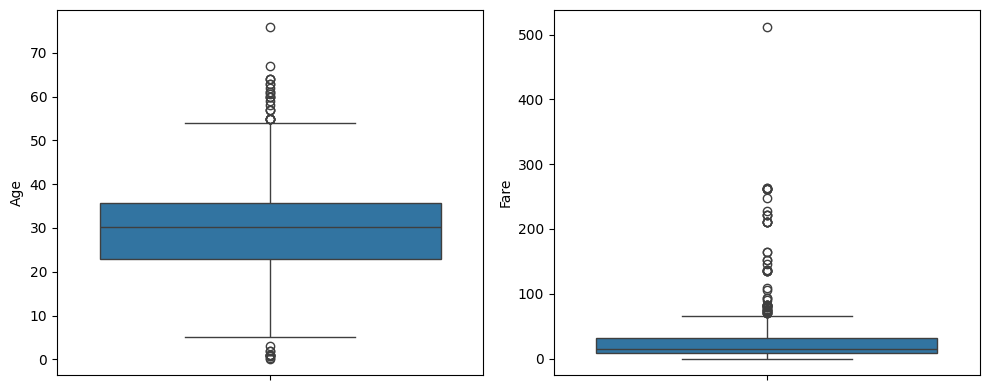

In [30]:
# Boxplot to identify Outliers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(y='Age', data=data)
plt.subplot(1, 2, 2)
sns.boxplot(y='Fare', data=data)
plt.tight_layout()
plt.show()

In [32]:
# Handling outliers with Interquartile range
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

data = remove_outliers_iqr(data, 'Age')
data = remove_outliers_iqr(data, 'Fare')

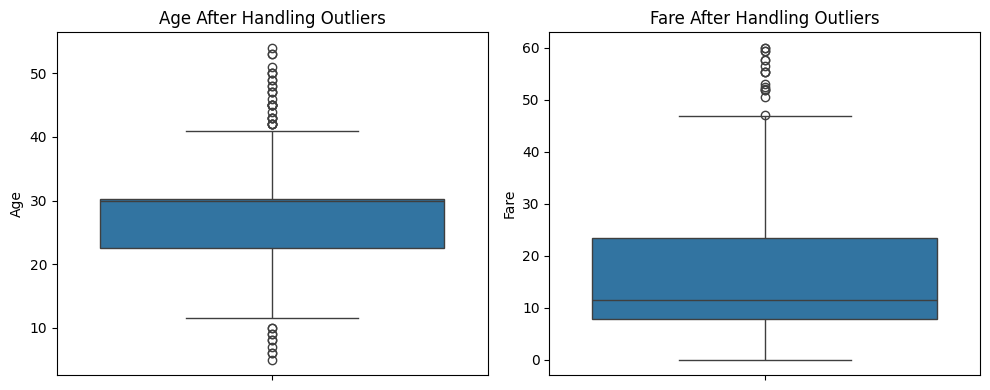

In [33]:
# Checking Box Plot again check outliers
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.boxplot(y='Age', data=data)
plt.title('Age After Handling Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(y='Fare', data=data)
plt.title('Fare After Handling Outliers')

plt.tight_layout()
plt.show()

<ipython-input-34-6a879e0046ef>:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


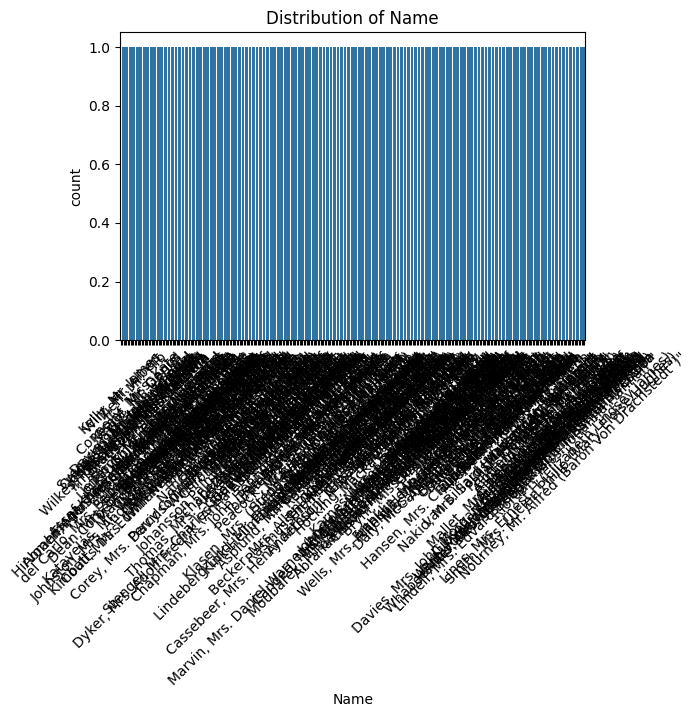

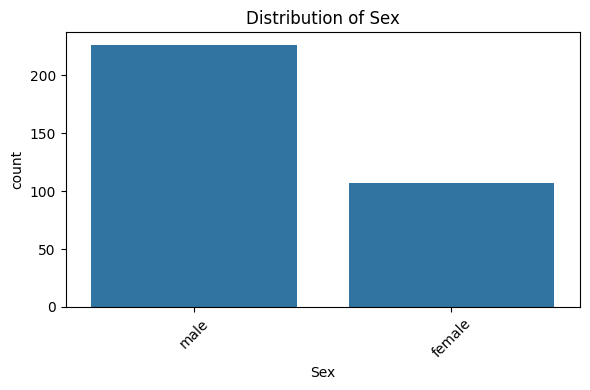

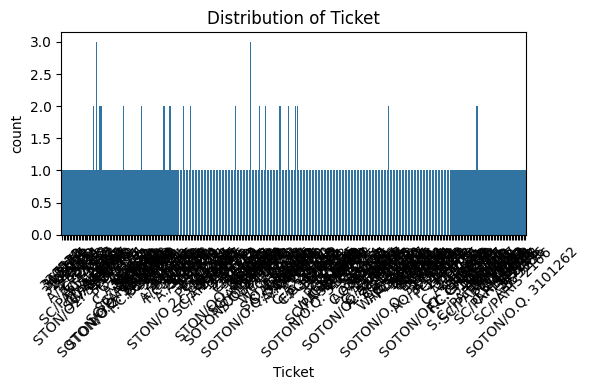

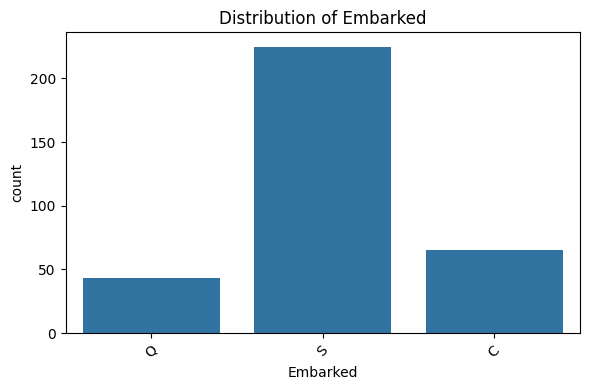

In [34]:
# Bar chart for categorical variables
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

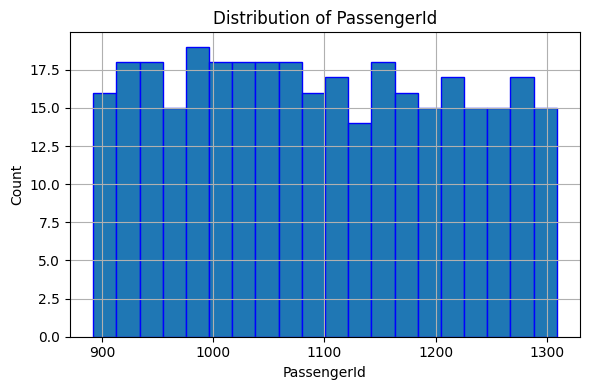

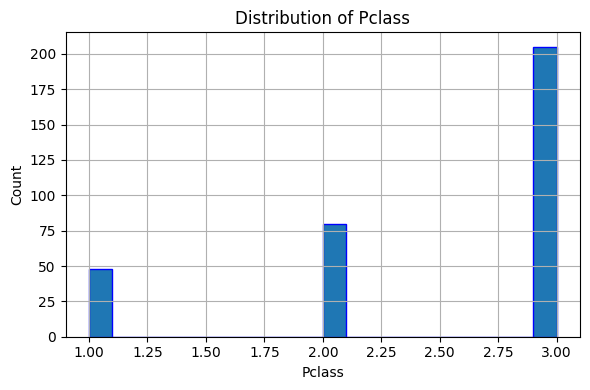

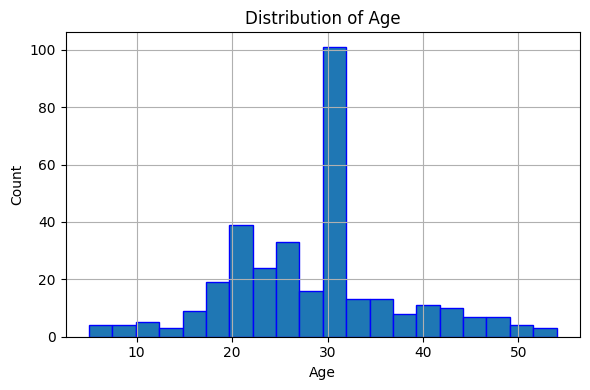

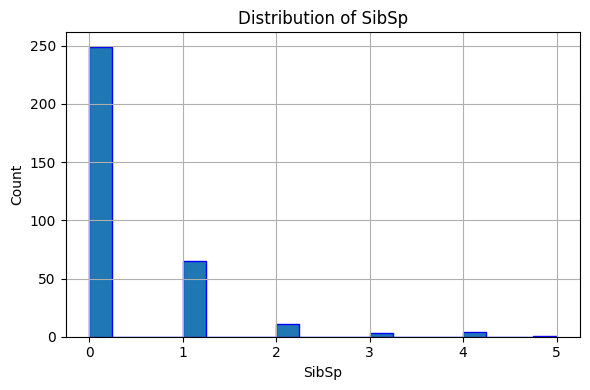

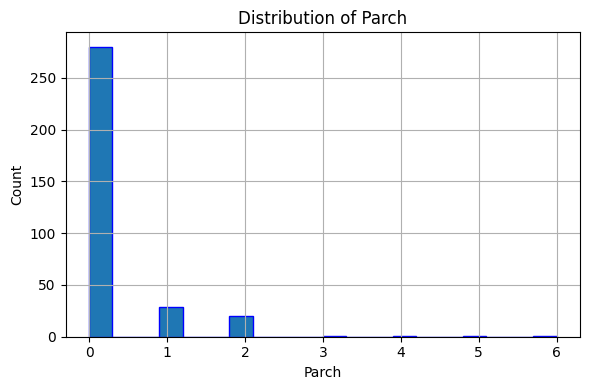

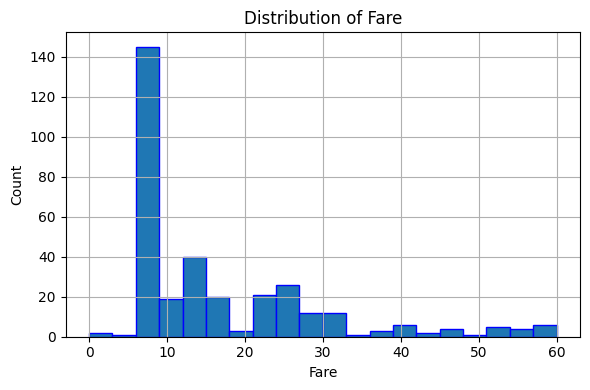

In [35]:
# Histogram for numeric distributions
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    data[col].hist(bins=20, edgecolor='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

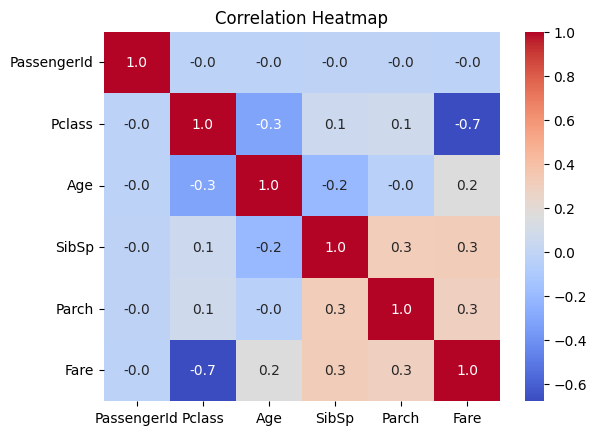

In [24]:
# Correlation Heatmap
import numpy as np

numeric_df = data.select_dtypes(include=[np.number])

corr = numeric_df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

<!--Summary of the Whole task-->
I loaded the Titanic dataset and checked for missing values, filling missing 'Age' values with the mean and 'Embarked' with the mode. Due to over 70% missing values, I dropped the 'Cabin' column. I visualized categorical features using count plots and numerical features with histograms to analyze distributions. After cleaning and handling missing data, the dataset was ready for further analysis or modeling.